In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [62]:
data_train = pd.read_csv("train.csv")

In [63]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
data_train.shape

(891, 12)

In [66]:
data_train.size

10692

In [67]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data visalization

<Axes: xlabel='Sex', ylabel='Survived'>

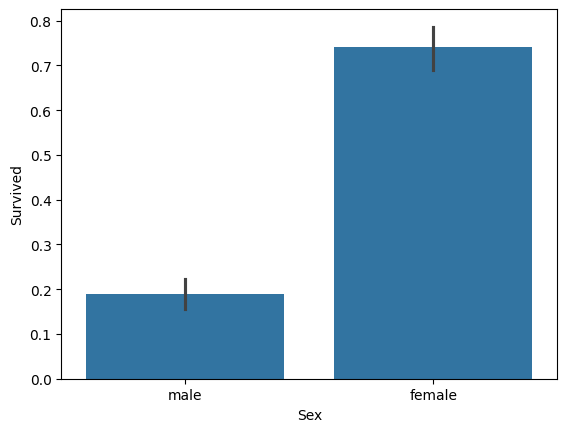

In [69]:
sns.barplot(x="Sex", y='Survived', data = data_train)


In [70]:
print('Percentage of women who survived', data_train['Survived'][data_train['Sex'] == 'female'].value_counts(normalize= True)[1]*100)

Percentage of women who survived 74.20382165605095


In [71]:
print('Percentage of men who survived', data_train['Survived'][data_train['Sex'] == 'male'].value_counts(normalize= True)[1]*100)

Percentage of men who survived 18.890814558058924


Percentage of Pclass 1 who survived 62.96296296296296
Percentage of Pclass 2 who survived 47.28260869565217
Percentage of Pclass 3 who survived 24.236252545824847


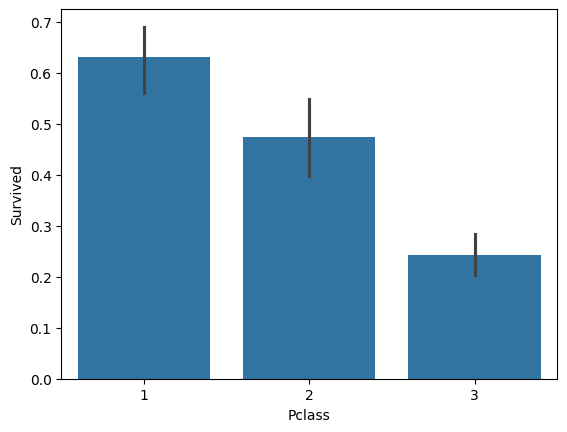

In [72]:
sns.barplot(x='Pclass', y='Survived', data = data_train)

print('Percentage of Pclass 1 who survived', data_train['Survived'][data_train['Pclass'] == 1].value_counts(normalize= True)[1]*100)
print('Percentage of Pclass 2 who survived', data_train['Survived'][data_train['Pclass'] == 2].value_counts(normalize= True)[1]*100)
print('Percentage of Pclass 3 who survived', data_train['Survived'][data_train['Pclass'] == 3].value_counts(normalize= True)[1]*100)

In [73]:
data_train.Age = data_train.Age.fillna(-0.5)

<Axes: xlabel='AgeGroup', ylabel='Survived'>

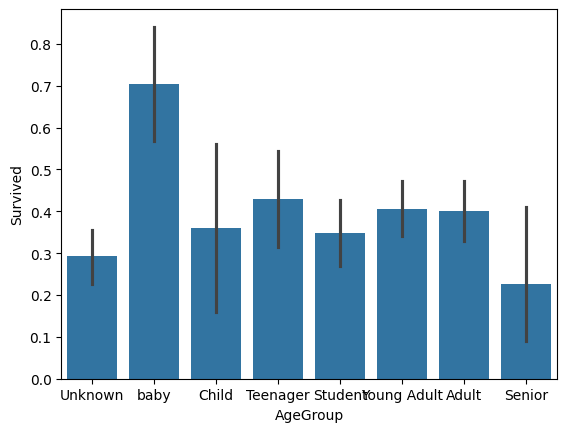

In [74]:
bins = [-1,0,5,12,18,24,35,60,np.inf]
labels= ['Unknown','baby','Child','Teenager','Student','Young Adult','Adult','Senior']

data_train['AgeGroup'] = pd.cut(data_train['Age'], bins, labels= labels)

sns.barplot( x= 'AgeGroup', y='Survived', data=data_train)


In [75]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [76]:
data_train['Cabin'].head(12)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
Name: Cabin, dtype: object

In [77]:
data_train = data_train.drop(['Ticket','Cabin','Fare'], axis = 1)

In [78]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,S,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C,Young Adult


<Axes: xlabel='Embarked', ylabel='Survived'>

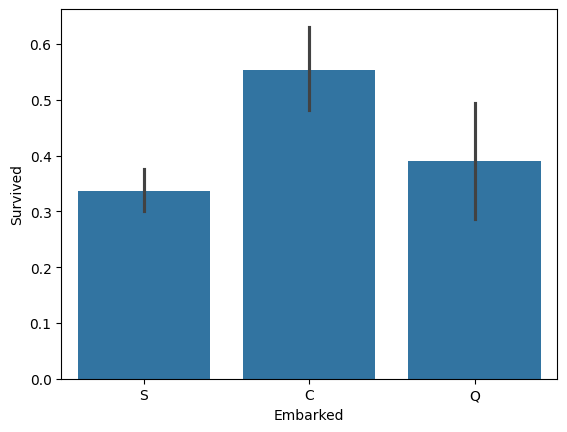

In [79]:
sns.barplot(x = 'Embarked', y='Survived', data=data_train)

Missing Values

In [80]:
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
AgeGroup       0
dtype: int64

In [81]:
Southamplton = data_train[data_train['Embarked'] == 'S'].shape[0]
print(Southamplton)
Cher = data_train[data_train['Embarked'] == 'C'].shape[0]
print(Cher)
Queen = data_train[data_train['Embarked'] == 'Q'].shape[0]
print(Queen)


644
168
77


In [82]:
data_train.Embarked = data_train.Embarked.fillna('N')

In [83]:
Null = data_train[data_train['Embarked'] == 'N'].shape[0]

In [84]:
Null

2

<Axes: xlabel='Embarked', ylabel='Survived'>

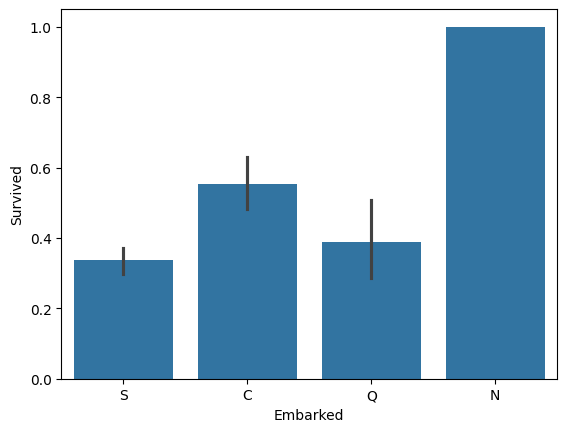

In [85]:
sns.barplot(x = 'Embarked', y='Survived', data=data_train)

In [86]:
Nullvalues = data_train[data_train['Embarked'] == 'N']

In [87]:
Nullvalues

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,N,Adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,N,Senior


In [88]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult


In [89]:
data_train.Embarked = data_train.Embarked.replace('N','S')

In [90]:
Southamplton = data_train[data_train['Embarked'] == 'S'].shape[0]
print(Southamplton)

646


In [91]:
data_test = pd.read_csv('train.csv')

In [92]:
data_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
data_test.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
data_test.Age = data_test.Age.replace('-0.5',-0.5)

In [95]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
data_test.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
data_test = data_test.drop(['Ticket','Fare','Cabin'], axis = 1)

In [98]:
data_test.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked'],
      dtype='object')

In [99]:
data_test.Embarked = data_test.Embarked.fillna('S')

<Axes: xlabel='AgeGroup', ylabel='Survived'>

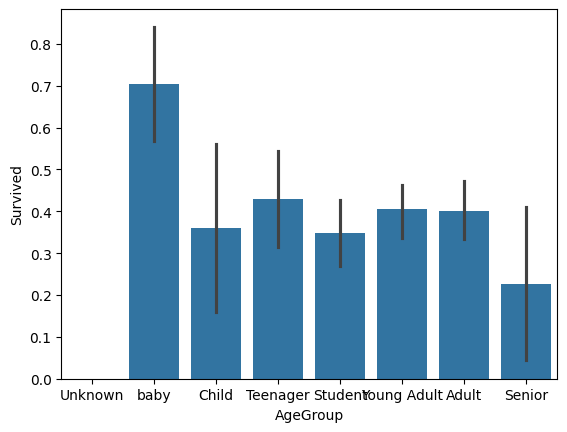

In [100]:
data_test['AgeGroup'] = pd.cut(data_test["Age"] , bins, labels= labels)

sns.barplot( x = "AgeGroup", y = 'Survived', data=data_test)

In [101]:
combine = [data_train, data_test]

In [102]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(r',\s*([A-Za-z]+)\.', expand = False)

pd.crosstab(data_train['Title'], data_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [103]:
for dataset in combine:
    dataset["Title"] = dataset['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev'],'Rare')

    dataset["Title"] = dataset['Title'].replace(['Lady','Sir'], 'Royal')
    dataset["Title"] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset["Title"] = dataset['Title'].replace('Mme','Mrs')

data_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [104]:
title_mapping = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Royal':5,'Rare':6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [105]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1.0


In [106]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Embarked     891 non-null    object  
 9   AgeGroup     891 non-null    category
 10  Title        891 non-null    float64 
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 71.0+ KB


In [107]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].astype(int)

In [108]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [109]:
mr_agegroup = data_train[data_train['Title'] == 1]['AgeGroup'].mode()     #Young Adult
miss_agegroup = data_train[data_train['Title'] == 2]['AgeGroup'].mode()   #Student
mrs_agegroup = data_train[data_train['Title'] == 3]['AgeGroup'].mode()    #Adult
master_agegroup = data_train[data_train['Title'] == 4]['AgeGroup'].mode() #baby
royal_agegroup = data_train[data_train['Title'] == 5]['AgeGroup'].mode()  #adult
rare_agegroup = data_train[data_train['Title'] == 6]['AgeGroup'].mode()   #adult





In [110]:
title_mapping

{'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Royal': 5, 'Rare': 6}

In [111]:
mr_agegroup,miss_agegroup,mrs_agegroup,master_agegroup,royal_agegroup,rare_agegroup

(0    Young Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Unknown
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    baby
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'])

In [112]:
age_title_map = {1 : 'Young Adult', 2 : 'Student', 3 : 'Adult', 4 : 'baby', 5 : 'Adult', 6 : 'Adult' }

for i in range(len(data_train['AgeGroup'])):
    if data_train['AgeGroup'][i] == 'Unknown':
        data_train['AgeGroup'][i] = age_title_map[data_train['Title'][i]]

for i in range(len(data_test['AgeGroup'])):
    if data_test['AgeGroup'][i] == 'Unknown':
        data_test['AgeGroup'][i] = age_title_map[data_test['Title'][i]]


C:\Users\harme\AppData\Local\Temp\ipykernel_13396\3175924044.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_train['AgeGroup'][i] = age_title_map[data_train['Title'][i]]


In [113]:
data_test.AgeGroup.unique()

['Student', 'Adult', 'Young Adult', NaN, 'baby', 'Teenager', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
Transform = ['Sex','Embarked','AgeGroup']
le = LabelEncoder()

for i in Transform:
    data_train[i] = le.fit_transform(data_train[i])

In [116]:
for i in Transform:
    data_test[i] = le.fit_transform(data_test[i])

data_test.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,5,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,5,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,5,1


In [117]:
X_train = data_train.drop(['PassengerId','Name','Survived'], axis= 1)
Y_train = data_train['Survived']
X_test = data_test.drop(['PassengerId','Name','Survived'], axis= 1)
Y_test = data_test['Survived']

In [118]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,Y_train)
preds =lr.predict(X_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
preds

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [ ]:
ids = data_test['PassengerId']
output = pd.DataFrame({'PassengerId': ids, 'Survived': preds})
output.to_csv('submission.csv', index = False )

In [ ]:
result = pd.read_csv('submission.csv')

In [ ]:
result.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [ ]:
data_main = data_test[['PassengerId', 'Survived']]


In [ ]:
data_main.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(Y_test, preds)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81
